<a href="https://colab.research.google.com/github/MHC-FA24-CS341CV/beyond-the-pixels-emerging-computer-vision-research-topics-fa24/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input Layer: The model starts with a Dense layer that takes a 100-dimensional random noise vector as input. This vector is transformed into a larger, flat representation of the image (7x7x128).
Reshape Layer: This reshapes the dense output into a 7x7x128 tensor, setting up the base resolution for the output image.
Conv2DTranspose Layers: These layers are used to upsample (increase the dimensions of) the image from 7x7 to 14x14, and finally to the target size of 28x28.
Activation: The last layer uses a tanh activation to output pixel values in a range between -1 and 1, which is common for GANs.

Below is code from Geeks for Geeks for a CGANS implementation, citation will be added at the end. https://www.geeksforgeeks.org/conditional-gans-cgans-for-image-generation/

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.9554643630981445, acc.: 17.7734375] [G loss: [array(0.8746596, dtype=float32), array(0.8746596, dtype=float32), array(0.25390625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


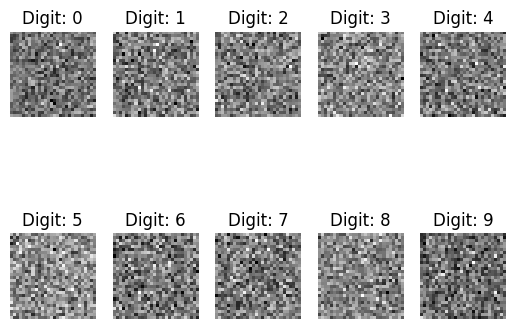

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [-1, 1] range
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Define some constants
BUFFER_SIZE = 60000
BATCH_SIZE = 128
NOISE_DIM = 100
NUM_CLASSES = 10
EPOCHS = 10000
SAVE_INTERVAL = 1000


def build_generator():
    noise_input = layers.Input(shape=(NOISE_DIM,))
    label_input = layers.Input(shape=(NUM_CLASSES,))

    merged_input = layers.Concatenate()([noise_input, label_input])

    x = layers.Dense(256)(merged_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization(momentum=0.8)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization(momentum=0.8)(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.BatchNormalization(momentum=0.8)(x)
    x = layers.Dense(np.prod((28, 28, 1)), activation='tanh')(x)
    img = layers.Reshape((28, 28, 1))(x)

    model = models.Model([noise_input, label_input], img)
    return model

def build_discriminator():
    img_input = layers.Input(shape=(28, 28, 1))
    label_input = layers.Input(shape=(NUM_CLASSES,))

    # Flatten the image input
    flat_img = layers.Flatten()(img_input)

    # Concatenate flattened image and label inputs
    merged_input = layers.Concatenate()([flat_img, label_input])

    x = layers.Dense(512)(merged_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    validity = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model([img_input, label_input], validity)
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    noise_input = layers.Input(shape=(NOISE_DIM,))
    label_input = layers.Input(shape=(NUM_CLASSES,))
    img = generator([noise_input, label_input])
    validity = discriminator([img, label_input])
    model = models.Model([noise_input, label_input], validity)
    return model



# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Training function
def train(epochs, batch_size=128, save_interval=200):
    # Load and preprocess the data
    X_train = x_train
    y_train_cat = y_train

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs, labels = X_train[idx], y_train_cat[idx]

        noise = np.random.normal(0, 1, (batch_size, NOISE_DIM))
        gen_labels = np.random.randint(0, NUM_CLASSES, batch_size)
        gen_labels_cat = tf.keras.utils.to_categorical(gen_labels, NUM_CLASSES)

        gen_imgs = generator.predict([noise, gen_labels_cat])

        d_loss_real = discriminator.train_on_batch([imgs, labels], valid)
        d_loss_fake = discriminator.train_on_batch([gen_imgs, gen_labels_cat], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, NOISE_DIM))
        sampled_labels = np.random.randint(0, NUM_CLASSES, batch_size)
        sampled_labels_cat = tf.keras.utils.to_categorical(sampled_labels, NUM_CLASSES)

        g_loss = gan.train_on_batch([noise, sampled_labels_cat], valid)

        # Print the progress
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_imgs(epoch)

def save_imgs(epoch):
    r, c = 2, 5
    noise = np.random.normal(0, 1, (r * c, NOISE_DIM))
    sampled_labels = np.arange(0, NUM_CLASSES).reshape(-1, 1)
    sampled_labels_cat = tf.keras.utils.to_categorical(sampled_labels, NUM_CLASSES)
    gen_imgs = generator.predict([noise, sampled_labels_cat])

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].set_title(f"Digit: {cnt}")
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train the GAN
train(EPOCHS, BATCH_SIZE, SAVE_INTERVAL)


Below is code attempting to create comparable SRGANs, now it has errors

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [-1, 1] range
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Define some constants
BUFFER_SIZE = 60000
BATCH_SIZE = 128
NOISE_DIM = 100
NUM_CLASSES = 10
EPOCHS = 10000
SAVE_INTERVAL = 1000

# SRGAN Generator
def build_srgan_generator():
    noise_input = layers.Input(shape=(NOISE_DIM,))
    label_input = layers.Input(shape=(NUM_CLASSES,))

    # Embed the label input (One-hot encoded)
    label_embedding = layers.Embedding(NUM_CLASSES, 50)(label_input)
    label_embedding = layers.Flatten()(label_embedding)

    # Concatenate noise and label embeddings
    model_input = layers.Concatenate()([noise_input, label_embedding])

    # Fully connected layers
    x = layers.Dense(256)(model_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)

    # Reshape into a suitable size for upsampling
    x = layers.Reshape((4, 4, 64))(x)  # Now reshape to (4, 4, 64)

    # Upsample to 56x56
    x = layers.UpSampling2D()(x)  # Upsample to 8x8
    x = layers.Conv2D(128, kernel_size=3, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.UpSampling2D()(x)  # Upsample to 16x16
    x = layers.Conv2D(128, kernel_size=3, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.UpSampling2D()(x)  # Upsample to 32x32
    x = layers.Conv2D(128, kernel_size=3, padding='same')(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.UpSampling2D()(x)  # Upsample to 56x56
    x = layers.Conv2D(1, kernel_size=3, padding='same', activation='tanh')(x)  # Output 56x56x1 image

    model = models.Model([noise_input, label_input], x)
    return model


# SRGAN Discriminator
def build_srgan_discriminator():
    img_input = layers.Input(shape=(56, 56, 1))  # Ensure discriminator accepts 56x56 images
    label_input = layers.Input(shape=(NUM_CLASSES,))

    # Flatten and concatenate the image with the label
    flat_img = layers.Flatten()(img_input)
    merged_input = layers.Concatenate()([flat_img, label_input])

    # Dense layers
    x = layers.Dense(512)(merged_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    validity = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model([img_input, label_input], validity)
    return model



# Perceptual loss using VGG19
def build_perceptual_loss_model():
    vgg = VGG19(weights='imagenet', include_top=False, input_shape=(56, 56, 3))
    vgg.trainable = False  # Freeze the VGG layers
    return models.Model(inputs=vgg.input, outputs=vgg.get_layer('block5_conv4').output)  # Use a layer's feature maps


def perceptual_loss(y_true, y_pred):
    vgg_model = build_perceptual_loss_model()
    return tf.reduce_mean(tf.square(vgg_model(y_true) - vgg_model(y_pred)))

# GAN model (combining generator and discriminator)
# Build and compile the GAN
def build_srgan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator for training the generator
    noise_input = layers.Input(shape=(NOISE_DIM,))
    label_input = layers.Input(shape=(NUM_CLASSES,))

    # Generator outputs an image (56x56)
    img = generator([noise_input, label_input])

    # Ensure the discriminator receives the image in 56x56 shape
    img_resized = layers.Resizing(56, 56)(img)  # Resize to 56x56 (if required)

    # Discriminator evaluates the generated image
    validity = discriminator([img_resized, label_input])

    model = models.Model([noise_input, label_input], validity)
    return model


# Build and compile the discriminator
discriminator = build_srgan_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the generator
generator = build_srgan_generator()

# Build and compile the GAN
gan = build_srgan(generator, discriminator)
gan.compile(loss=perceptual_loss, optimizer='adam')

# Training function for SRGAN
def train_srgan(epochs, batch_size=128, save_interval=200):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Select a random batch of low-resolution images and their labels
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs, labels = x_train[idx], y_train[idx]

        # Downscale images to create low-resolution images (e.g., from 28x28 to 14x14)
        lr_imgs = tf.image.resize(imgs, (14, 14))  # Downscale to low-res

        noise = np.random.normal(0, 1, (batch_size, NOISE_DIM))
        gen_labels = np.random.randint(0, NUM_CLASSES, batch_size)
        gen_labels_cat = tf.keras.utils.to_categorical(gen_labels, NUM_CLASSES)

        # Train Discriminator
        gen_imgs = generator.predict([noise, gen_labels_cat])
        d_loss_real = discriminator.train_on_batch([imgs, labels], valid)
        d_loss_fake = discriminator.train_on_batch([gen_imgs, gen_labels_cat], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator (with perceptual loss)
        g_loss = gan.train_on_batch([noise, gen_labels_cat], valid)

        # Print progress
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_imgs(epoch)

# Save generated images
def save_imgs(epoch):
    r, c = 2, 5
    noise = np.random.normal(0, 1, (r * c, NOISE_DIM))
    sampled_labels = np.arange(0, NUM_CLASSES).reshape(-1, 1)
    sampled_labels_cat = tf.keras.utils.to_categorical(sampled_labels, NUM_CLASSES)
    gen_imgs = generator.predict([noise, sampled_labels_cat])

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].set_title(f"Digit: {cnt}")
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train the SRGAN
train_srgan(EPOCHS, BATCH_SIZE, SAVE_INTERVAL)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step


ValueError: Input 0 of layer "functional_61" is incompatible with the layer: expected shape=(None, 56, 56, 1), found shape=(128, 28, 28)

In [30]:
import time

def train_and_measure_time(model_type, epochs=10000, batch_size=128):
    start_time = time.time()

    # Train the selected model
    if model_type == 'cgan':
        train_cgan(epochs, batch_size)
    elif model_type == 'srgan':
        train_srgan(epochs, batch_size)

    end_time = time.time()
    training_time = end_time - start_time
    print(f"{model_type.upper()} Training Time: {training_time:.2f} seconds")
    return training_time

#Compare like this
cgan_time = train_and_measure_time('cgan', EPOCHS, BATCH_SIZE)
srgan_time = train_and_measure_time('srgan', EPOCHS, BATCH_SIZE)


NameError: name 'train_cgan' is not defined